In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import *
from scipy.integrate import quad
import TridiagonalMatrixHandler as tmh
%matplotlib notebook

# $$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2} + au(1-\frac{I}{T(I)}) - σu;$$

$$F(u)=au^i_j\cdot(1- \frac{I}{T(I)})- \sigma u^{i+1}_j$$
$$где\qquad T(I)=T(I(u))=K + K_1I(u); \qquad I=I(u) = \int_0^1 u(x,t)dx.$$

In [10]:
tmh.showAllConstant()
K1 = 12

def allSourceFraction(numerator, i, u1):
    integrall_tmp = quad(lambda x: u1, 0, tmh.L)[0]
    F = K1 + tmh.sourceKoeff * integrall_tmp
    return integrall_tmp/F

u, x = tmh.createAndSolveMatrix(allSourceFraction)
print("\nФункция по которой считаем доступные ресурсы T(I)= " + str(tmh.sourceKoeff) + " + " + str(K1) +" * integral(u(x,t)*dx)")
#print(u.max())

Коэффициент миграции (D) = 0.5	Рождения новых людей (a) = 2.0
Смертность населения (σ) = 1.0	Ёмкость среды K = 2.0
Количество точек по ОХ (N) = 100	Количество точек по времени (KT) = 1000

Функция по которой считаем доступные ресурсы T(I)= 2.0 + 12 * integral(u(x,t)*dx)


<IPython.core.display.Javascript object>


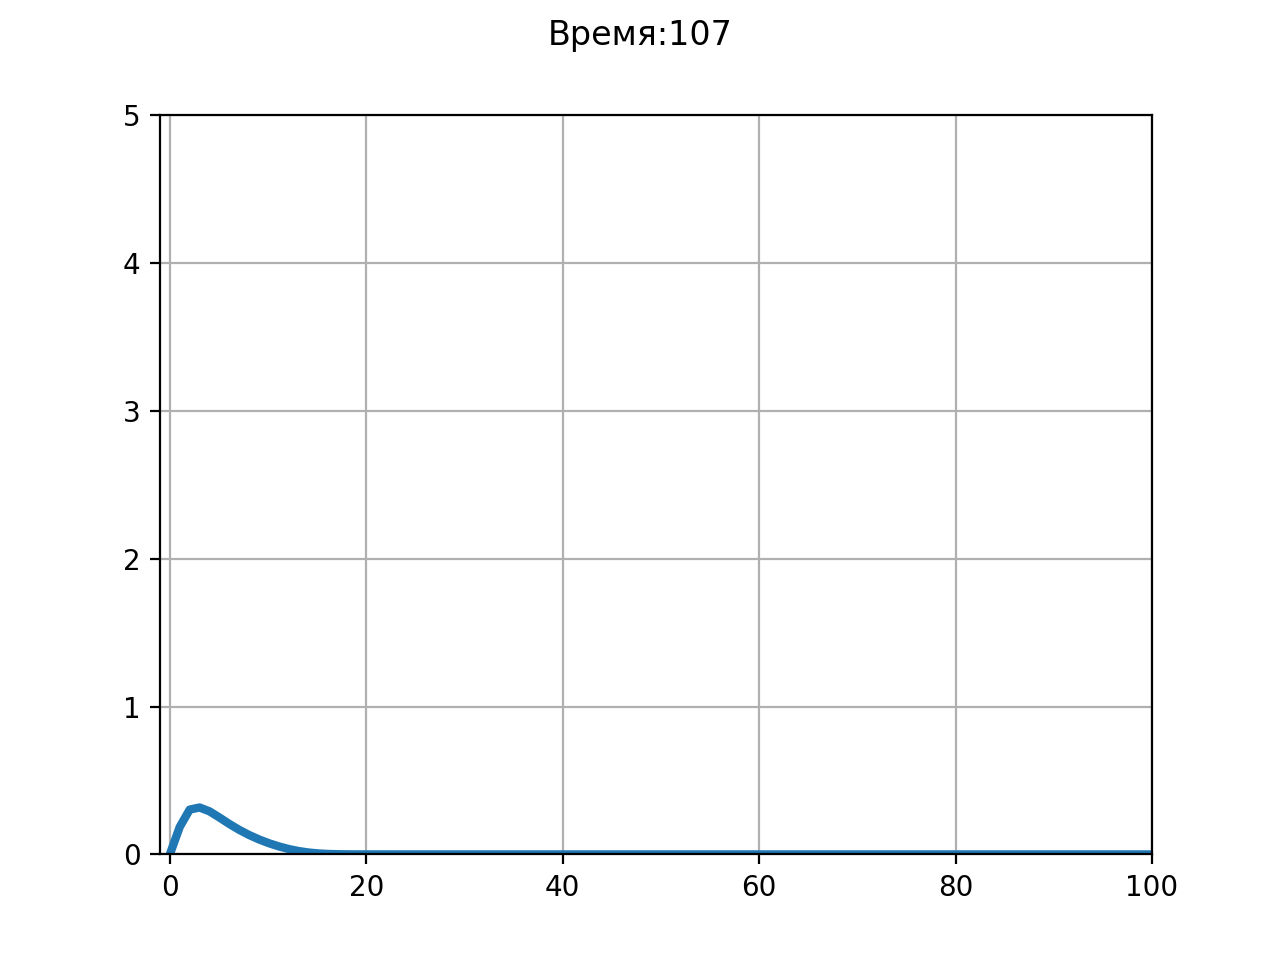

In [11]:
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(-1, tmh.L), ylim=(0, 5) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=tmh.KT,interval=100)
plt.grid(True)
plt.show()

In [12]:
diff = 0.5
value = 0
for i in range(1, tmh.N - 1):
    if abs(u[int(tmh.N/3), int(tmh.KT/3)] - u[i, int(tmh.KT/3) + 1]) < diff and x[int(tmh.N/3)] != x[i]:
        diff = abs(u[int(tmh.N/3), int(tmh.KT/3)] - u[i, int(tmh.KT/3) + 1])
        value = abs(x[int(tmh.N/3)] - x[i])
print('Speed:', value/tmh.tau)


Speed: 10.090909090909093
